# Github

<a href="https://colab.research.google.com/github/mariimao/JSC270_HW2_2022_MZhao/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is the [link](https://github.com/mariimao/JSC270_HW2_2022_MZhao) to my GitHub repo. Below are the import statements copied from the [starter code](https://github.com/UofT-JSC270/JSC270_HW2).

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# import data
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    header=None,
)

df.columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "gross_income_group",
]

# Data Analysis

## Initial Data Exploration

### Columns of the Data

In [3]:
# print basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Yes, they are the expected data types based on the descriptions in the [text file](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Using the `info()`, we can see that the columns such as `age`, `fnlwgt`, `education-num`, `capital-gain`, `capital-loss`, and `hours-per-week` are `int64` type, which works well with the continuous numerical data types described in the text file. We have the rest of the columns (such as `workclass`, `education`, `marital_status`, etc.) as `object` types, which is useful for categorical data types.

### Missing Values

We can see from the text file that missing values are indicated with ` ?` value. So we can go through all the columns and count the number of times `?` appears. Also note that only `object` types can have `?` values. We will also replace the missing values with `np.NaN`.

(We see that all the `object` values have some whitespace in the front. We need to clean this up as well using the `replace` function and regex.)

In [4]:
# remove white space in front of the values
df = df.replace(r'^\s+', '', regex=True)

In [5]:
# go through each column and count the number of '?' occurences
for column in df.columns:
    count = (df[column] == "?").sum()
    print(f"The column {column} has {count} missing values.")

# replaces the missing values with np.nan
df = df.replace("?", np.NaN)

The column age has 0 missing values.
The column workclass has 1836 missing values.
The column fnlwgt has 0 missing values.
The column education has 0 missing values.
The column education_num has 0 missing values.
The column marital_status has 0 missing values.
The column occupation has 1843 missing values.
The column relationship has 0 missing values.
The column race has 0 missing values.
The column sex has 0 missing values.
The column capital_gain has 0 missing values.
The column capital_loss has 0 missing values.
The column hours_per_week has 0 missing values.
The column native_country has 583 missing values.
The column gross_income_group has 0 missing values.


We find that `workclass` has 1836 missing values, `occupation` has 1843 missing values, `native_country` has 583 missing values, and the rest has zero.

### Capital Gain and Capital Loss Distributions and Transformations

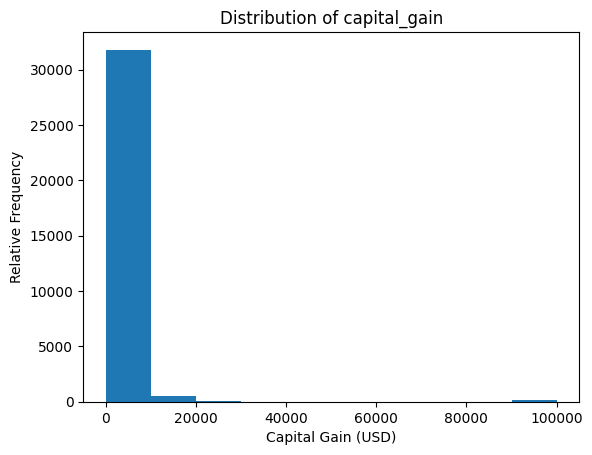

In [6]:
# Plot histogram of capital_gain
plt.hist(df.capital_gain, bins=10)
plt.title('Distribution of capital_gain')
plt.xlabel('Capital Gain (USD)')
plt.ylabel('Relative Frequency')
plt.show()

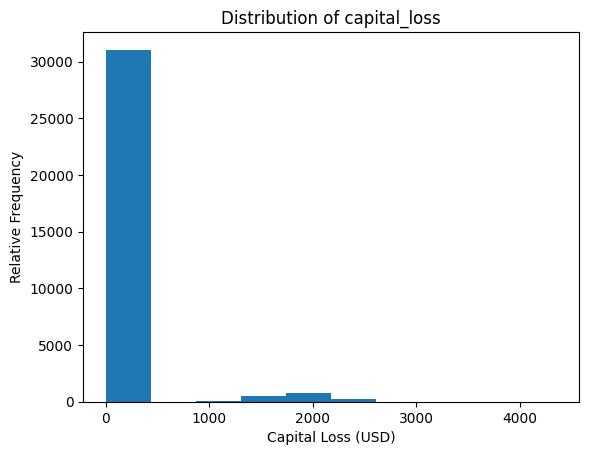

In [7]:
# Plot histogram of capital_loss
plt.hist(df.capital_loss, bins = 10)
plt.title('Distribution of capital_loss')
plt.xlabel('Capital Loss (USD)')
plt.ylabel('Relative Frequency')
plt.show()

These histograms do not tell us much other than the fact that most of the values are 0. Therefore, it will be more useful to use a categorical variable so we can see the presence of capital gain or loss can affect other variables. We will create two new variables, `has_capital_gain` and `has_capital_loss`, which will be binary variables. We can plot their distributions below.

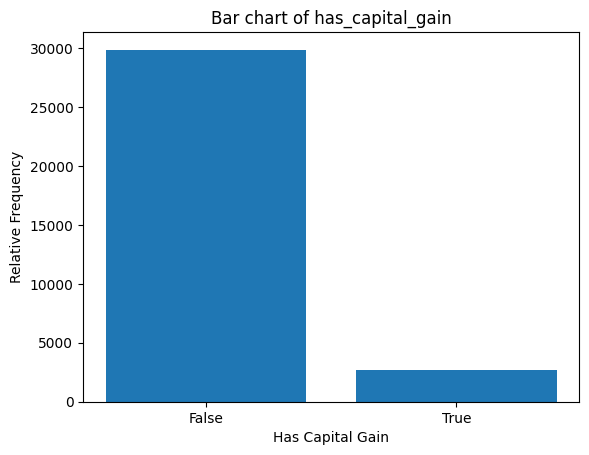

In [8]:
# Create has_capital_gain column
df['has_capital_gain'] = df.capital_gain > 0

# Plot bar chart of has_capital_gain
plt.bar(['False', 'True'], df.has_capital_gain.value_counts().values)
plt.title('Bar chart of has_capital_gain')
plt.xlabel('Has Capital Gain')
plt.ylabel('Relative Frequency')
plt.show()

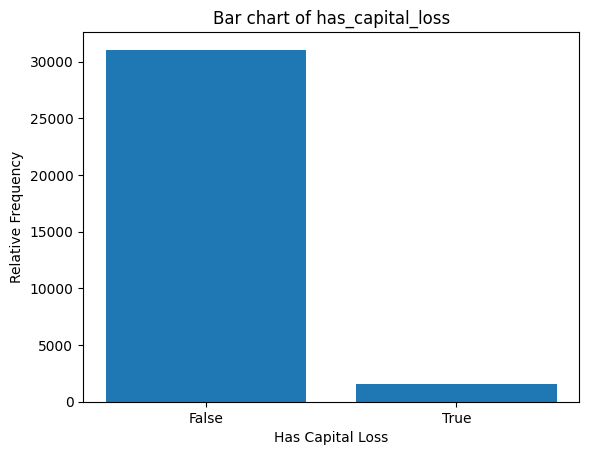

In [9]:
# Create has_capital_loss column
df['has_capital_loss'] = df.capital_loss > 0

# Plot bar chart of has_capital_loss
plt.bar(['False', 'True'], df.has_capital_loss.value_counts().values)
plt.title('Bar chart of has_capital_loss')
plt.xlabel('Has Capital Loss')
plt.ylabel('Relative Frequency')
plt.show()

### Exploring Distribution of Final Weight

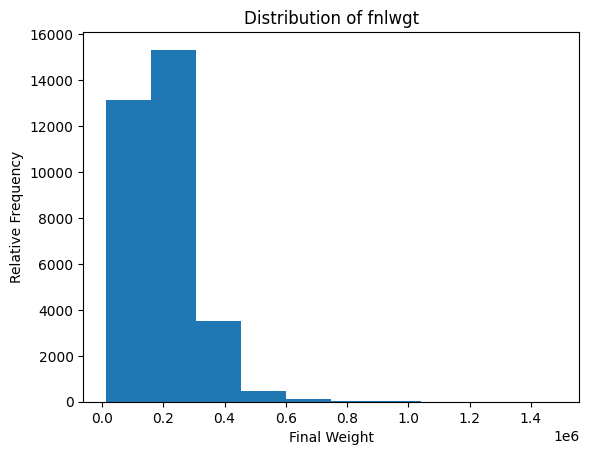

In [10]:
# Plot histogram of fnlwgt
plt.hist(df.fnlwgt, bins=10)
plt.title("Distribution of fnlwgt")
plt.xlabel("Final Weight")
plt.ylabel("Relative Frequency")
plt.show()

We see that the variable is not symmetrically distributed. We can investigate further by exploring the distribution of this variable between men and women.

In [11]:
# Count how many are in each category
df["sex"].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

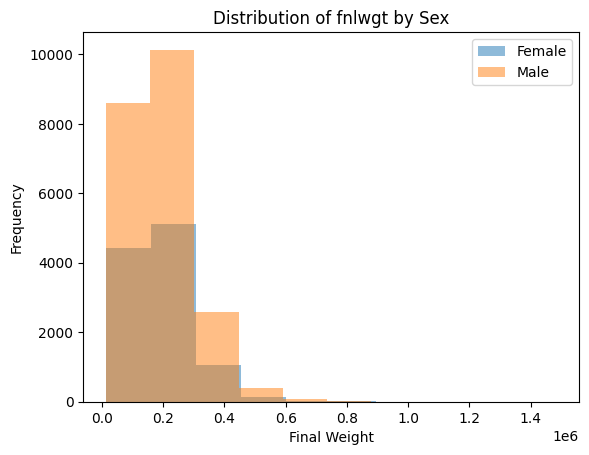

In [12]:
# Group by sex
grouped = df.groupby("sex")

# Plot histogram of fnlwgt by sex
grouped["fnlwgt"].hist(alpha=0.5, bins=10)
plt.title("Distribution of fnlwgt by Sex")
plt.xlabel("Final Weight")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.grid(False)
plt.show()

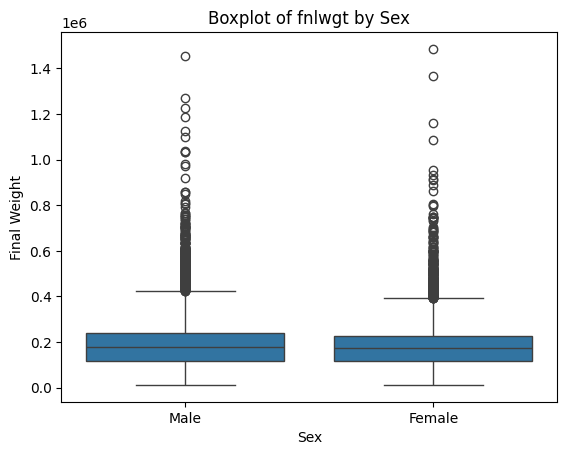

In [13]:
# Boxplot of fnlwgt by sex
sns.boxplot(x="sex", y="fnlwgt", data=df)
plt.title("Boxplot of fnlwgt by Sex")
plt.xlabel("Sex")
plt.ylabel("Final Weight")
plt.show()

Keeping in mind that the number of men surveyed are twice as big as the number of women surveyed, we see from the histogram that both groups are still right-skewed. In the boxplot, we see there are a lot of outliers.

However, we should not exclude these outliers. Since we are dealing with a skewed distribution, removing them is not useful.

## Correlation

### Are any Variables Correlated?

In [14]:
# calculate and print the correlation matrix
correlations = df[["age", "education_num", "hours_per_week"]].corr()
print(correlations)

                     age  education_num  hours_per_week
age             1.000000       0.036527        0.068756
education_num   0.036527       1.000000        0.148123
hours_per_week  0.068756       0.148123        1.000000


Using the `corr` function for `age`, `education_num`, and `hours_per_week`, we can create a correlation matrix. We see from the correlation matrix that for any two different variables, they have a weak positive correlation ($|r|<0.2$). Without accounting for any confounding variables, it is likely that they are not correlated.

### Statistical Test for Variables with $r>|0.1|$

We see that only the correlation coefficient between `education_num` and `hours_per_week` are $>|0.1|$. We will conduct a hypothesis test for its difference from 0.

Let $H_0: r = 0$ and $H_1: r \neq 0$.

In [15]:
# perform a pearson correlation test
r, p = stats.pearsonr(df["education_num"], df["hours_per_week"])
print("r=%.3f,p=%.3f" % (r,p))

# get results
alpha = 0.05
if p > alpha:
    print("Fail to reject H0")
else:
    print("Reject H0")

r=0.148,p=0.000
Reject H0


Using the `pearsonr` function, we get the p-value is smaller than $\alpha$. Then we can reject the null and conclude that the difference between the correlation coefficient and 0 are statistically different.

The direction is positive, that as one of `education_num` or `hours_per_week` increases, the other will also increase slightly.

The direction and significant are as expected since as we go to higher levels of education, we are typically more involved in our jobs.

### Education Number and Age for Male and Female

In [16]:
# Split the dataset into male and female groups
male_df = df[df["sex"] == "Male"]
female_df = df[df["sex"] == "Female"]

# set alpha
alpha = 0.05

# perform a pearson correlation test for male
r, p = stats.pearsonr(male_df["education_num"], male_df["age"])
print("Male participants: r=%.3f,p=%.3f" % (r, p))
if p > alpha:
    print("Fail to reject H0")
else:
    print("Reject H0")

# perform a pearson correlation test for female, output results
r, p = stats.pearsonr(female_df["education_num"], female_df["age"])
print("Female participants: r=%.3f,p=%.3f" % (r, p))
alpha = 0.05
if p > alpha:
    print("Fail to reject H0")
else:
    print("Reject H0")

Male participants: r=0.060,p=0.000
Reject H0
Female participants: r=-0.018,p=0.063
Fail to reject H0


There is a stronger correlation between `education_num ` and `age` for male participants than female participants. We also see that the p-value for male participants is less than $\alpha$, so it is likely to be different from 0. For the female participants, this is not the case. 

However, from our initial data exploration, we saw that there were twice as much male participants than there were female participants. Thus, this difference between the two groups may be a result of different sample sizes as a bigger sample size can often show a stronger correlation than a smaller one. So this different is expected.

### Covariance matrix

In [17]:
# create and print a covariance matrix
cov_matrix = df[['education_num', 'hours_per_week']].cov()
print(cov_matrix)

                education_num  hours_per_week
education_num        6.618890        4.705338
hours_per_week       4.705338      152.458995


The covariance of `education_num` with itself is just the variance of `education_num`. This measures how much the values deviate from their mean.

Similarly, the `hours_per_week` variance tells us how much it deviates from the mean. A higher variance indicates that the values are more spread out. So there is a larger spread for the number of hours worked per week.

The covariance between `education_num` and `hours_per_week` tells us the direction of the relationship between the two variables. Since it is positive, then when one variable is high, the other variable is too. We can interpret this as people with higher levels of education will tend to work more hours per week.

## Regression

### Do Men Work More Hours?

In [18]:
# create and print a regression model
reg = smf.ols("hours_per_week ~ sex", data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:38:59   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      36.4104      0.116    314.412      

Our model looks like $Y=\hat{\beta}_0 + \hat{\beta}_1 X_1 + \epsilon$ where $Y$ is the `hours_per_week`, $X_1$ is the `sex`, and $\epsilon$ is the error.

From the least squares regression results, we see that the coefficient for the intercept is 36.4104 and the coefficient for `sex[T.male]` is 6.0177. Since `sex` is a binary variable, then we know that the intercept is equivalent to the mean hours per work for women. The coefficient for `sex[T.male]` indicates that men on average do in fact work 6.0177 more hours than women. Since both coefficients have a p-value smaller than $\alpha = 0.05$, then they are statistically significant suggesting `sex` is a significant predictor for `hours_per_week`.

### Education Number as Control Variable

In [19]:
# use education_num as a control variable in the regression model
reg_education = smf.ols("hours_per_week ~ sex + education_num", data=df).fit()
print(reg_education.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:38:59   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

Our model now looks like $Y=\hat{\beta}_0 + \hat{\beta}_1 X_1 + \hat{\beta}_2 X_2 + \epsilon$, where the new variable $X_2$ is `education_num`.

From the least squares regression results with `education_num` as a control, the coefficient for `sex[T.Male]` is 5.9709, indicating that when we hold `education_num` constant, the estimated expected difference in `hours_per_week` for the two sexes is 5.9709. This value is relatively similar to what we calculated before, so we still see that the trend in hours worked by men vs women remain the same. 

The coefficient for `education_num` is relatively small, indicating the control only has a small effect on the hours per week, holding sex constant. Its p-value is also less than $\alpha = 0.05$, which indicates that it is statistically significant. We also have a 95% confident interval of [0.647,0.748], which is a relatively small range. Then we conclude that the `education_num` likely does not have a large effect on our results.

### Comparing Models

In [20]:
# add gross_income_group as a control variable in the first regression model
reg_gross_income_group = smf.ols("hours_per_week ~ sex + gross_income_group", data=df).fit()
print(reg_gross_income_group.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1544.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:38:59   Log-Likelihood:            -1.2657e+05
No. Observations:               32561   AIC:                         2.531e+05
Df Residuals:                   32558   BIC:                         2.532e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

When we include the `gross_income_group` as a binary variable, we see that it has a relatively big effect on the hours per week variable. In our regression results, the coefficient for `gross_income_group[T.>50K]` is 5.4572, meaning that when the gross income is greater than $50,000, they will likely work more hours each week, holding `sex` constant. The `sex[T.Male]` coefficient also decreased to 4.9466, indicating that men still work more hours (by about 4.9466 hours), but their sex has less of an effect now that we are controlling for gross income. Note that all coefficients are statistically significant based on their calculated p-values.

In [21]:
# add gross_income_group as a control variable in the first regression model
reg_education_gross_income_group = smf.ols("hours_per_week ~ sex + education_num + gross_income_group", data=df).fit()
print(reg_education_gross_income_group.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:38:59   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

This model shows how all three variables can affect the number of hours per week. We see that `education_num` has a coefficient of 0.4478 and `gross_income_group` has a coefficient of 4.5175. With both of these accounted for, we see that the coefficient for `sex[T.Male]` is 5.1010, which is smaller than what we got in part 3.2, but larger than what we got in the model before. The coefficient for sex indicates that men still work more hours than women (by about 5.1010), when we account for gross income and education number. All p-values indicate the coefficients are significant.

To determine which of the three models are the "best", we can compare the adjusted coefficient of determination $R^2$ or RSE. 

The coefficient of determination tells use how much variability in the dataset is captured by the regression model. The one with the highest $R^2$ is the third model with `gross_income_group` and `education_num` as additional controls. Its $R^2$ is 0.094. The second best is the model with just `gross_income_group` as a control with an $R^2$ of 0.087. The worst one is with `education_num` as a control with a value of 0.074. However, all of these values are relatively similar so we can take a look at their residual standard error (RSE) values.

In [22]:
# print the residual standard error of each model
print(reg_education.mse_resid)
print(reg_gross_income_group.mse_resid)
print(reg_education_gross_income_group.mse_resid)

141.23145178884246
139.2600975807849
138.09108966554118


We see that the one with the smallest RSE is the one with `gross_income_group` and `education_num` as controls. This results, in combination with our result from comparing the coefficient of determination tells use that the last model is the best one.

# Reporting on my own Regression Analysis

In [23]:
# create and print a regression model comparing hours per week and race
my_reg = smf.ols("hours_per_week ~ race", data=df).fit()
print(my_reg.summary())
print(reg_education_gross_income_group.mse_resid)

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     24.41
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           3.37e-20
Time:                        20:39:00   Log-Likelihood:            -1.2799e+05
No. Observations:               32561   AIC:                         2.560e+05
Df Residuals:                   32556   BIC:                         2.560e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

(Check pdf for report.)